Before you submit this tick, make sure everything runs as expected. First, **save your work** (in the menubar, select File$\rightarrow$Save and Checkpoint). Then **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", and remove any instances of `failwith "Not implemented";;`


---

# FoCS Tick 3 - Functional Arrays as Binary Trees

This exercise concerns the tree representation of functional arrays, subscripted by positive integers according to their representation in binary notation. Compared with binary search tree approaches no labels need to be stored, trees always remained balanced, and access time is always logarithmic.

The following cell declares the type to use and installs a printer to visualise the trees you produce.

In [1]:
#require "focs";;
#require "jupyter.notebook";;

let p = Focs.Tree.printer string_of_int;;
#install_printer p;;

type 'a tree = 'a Focs.Tree.t =
  | Lf
  | Br of 'a * 'a tree * 'a tree;;


val p : int Focs.Tree.t -> unit = <fun>


type 'a tree = 'a Focs.Tree.t = Lf | Br of 'a * 'a tree * 'a tree


1. Write an OCaml function `arrayoflist` to convert the list $[x_1,...x_n]$ to the corresponding functional array having $x_i$ at subscript position $i$ for $i = 1,...,n$. This can be done without calling the update operation. One way is with the help of the following little function, if you can figure out what it does:


In [2]:
let rec tcons v = function
  | Lf -> Br (v, Lf, Lf)
  | Br (w, t1, t2) -> Br (v, tcons w t2, t1)

val tcons : 'a -> 'a tree -> 'a tree = <fun>


In [3]:
let rec arrayoflist l = match l with
    | [] -> Lf
    | x::xs -> tcons x (arrayoflist xs)

val arrayoflist : 'a list -> 'a tree = <fun>


The following cell contains some tests for your `arrayoflist` function.

In [4]:
assert(arrayoflist [] = Lf);;
assert(arrayoflist [0] = Br (0, Lf, Lf));;
assert(arrayoflist [0;1] = Br (0, Br (1, Lf, Lf), Lf));;
assert(arrayoflist [0;1;2] = Br (0, Br (1, Lf, Lf), Br (2, Lf, Lf)));;
assert(arrayoflist [0;1;2;3] = Br (0, Br (1, Br (3, Lf, Lf), Lf), Br (2, Lf, Lf)));;
assert(arrayoflist [0;1;2;3;4;5;6;7;8;9;10;11] = Br (0,
   Br (1, Br (3, Br (7, Lf, Lf), Br (11, Lf, Lf)),
    Br (5, Br (9, Lf, Lf), Lf)),
   Br (2, Br (4, Br (8, Lf, Lf), Lf), Br (6, Br (10, Lf, Lf), Lf))));;

- : unit = ()


- : unit = ()


- : unit = ()


- : unit = ()


- : unit = ()


- : unit = ()


It may be helpful to note that the trees produced may be visualised as follows:

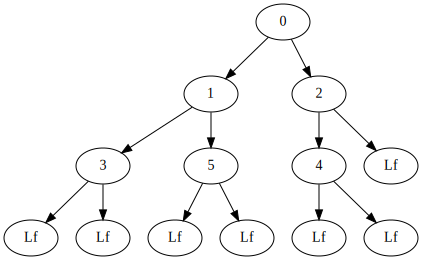

Br(0,Br(1,Br(3,Lf,Lf),Br(5,Lf,Lf)),Br(2,Br(4,Lf,Lf),Lf))

- : int tree = 


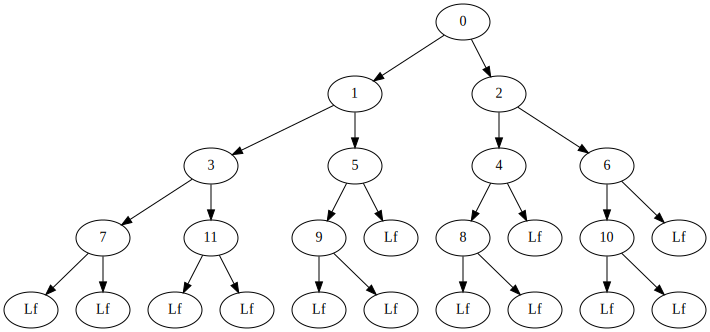

Br(0,Br(1,Br(3,Br(7,Lf,Lf),Br(11,Lf,Lf)),Br(5,Br(9,Lf,Lf),Lf)),Br(2,Br(4,Br(8,Lf,Lf),Lf),Br(6,Br(10,Lf,Lf),Lf)))

- : int tree = 


In [5]:
Br(0,Br(1,Br(3,Lf,Lf),Br(5,Lf,Lf)),Br(2,Br(4,Lf,Lf),Lf));;
arrayoflist [0;1;2;3;4;5;6;7;8;9;10;11];;

2. Code a function listofarray, the inverse of the function arrayoflist declared above.

In [6]:
let thd = function
    | Br(v, _, _) -> v

let rec ttl = function
    | Br(v, Lf, Lf) -> Lf
    | Br(v, t1, t2) -> Br((thd t1), t2, ttl t1)
    

let rec listofarray = function
    | Lf -> []
    | x -> (thd x) :: (listofarray (ttl x))
    

File "[6]", lines 1-2, characters 10-22:
1 | ..........function
2 |     | Br(v, _, _) -> v
Warning 8 [partial-match]: this pattern-matching is not exhaustive.
Here is an example of a case that is not matched:
Lf


val thd : 'a tree -> 'a = <fun>


File "[6]", lines 4-6, characters 14-47:
4 | ..............function
5 |     | Br(v, Lf, Lf) -> Lf
6 |     | Br(v, t1, t2) -> Br((thd t1), t2, ttl t1)
Warning 8 [partial-match]: this pattern-matching is not exhaustive.
Here is an example of a case that is not matched:
Lf


val ttl : 'a tree -> 'a tree = <fun>


val listofarray : 'a tree -> 'a list = <fun>


The following is a test of `listofarray`. As before, there is no need to understand in detail what is going on here.

In [7]:
let _ =
    let test_cases = [
        [];
        [0];
        [7;6;5];
        [9;8;7;6;5;4;3;2;1;0];
        [0;1;2;3;4;5;6;7;8;9];
        [1;1;1;1;1;1;1;1;1;1]
    ] in
    let test_results = List.map (fun a ->
        let orig_list_str = String.concat ";" (List.map string_of_int a) in
        let arr = arrayoflist a in
        let arr_str = Focs.Tree.string_of string_of_int arr in
        let a' = listofarray arr in
        let final_list_str = String.concat ";" (List.map string_of_int a') in
        (orig_list_str, arr_str, final_list_str)) test_cases in
    List.iter (fun (o,a,f) ->
        let _ = Jupyter_notebook.display "text/plain"
            (Printf.sprintf
                "Test case : [%s]\nTree.     : %s\nFinal list: [%s]"
                o a f) in
        assert(o=f)) test_results


Test case : []
Tree.     : Lf
Final list: []

Test case : [0]
Tree.     : Br(0,Lf,Lf)
Final list: [0]

Test case : [7;6;5]
Tree.     : Br(7,Br(6,Lf,Lf),Br(5,Lf,Lf))
Final list: [7;6;5]

Test case : [9;8;7;6;5;4;3;2;1;0]
Tree.     : Br(9,Br(8,Br(6,Br(2,Lf,Lf),Lf),Br(4,Br(0,Lf,Lf),Lf)),Br(7,Br(5,Br(1,Lf,Lf),Lf),Br(3,Lf,Lf)))
Final list: [9;8;7;6;5;4;3;2;1;0]

Test case : [0;1;2;3;4;5;6;7;8;9]
Tree.     : Br(0,Br(1,Br(3,Br(7,Lf,Lf),Lf),Br(5,Br(9,Lf,Lf),Lf)),Br(2,Br(4,Br(8,Lf,Lf),Lf),Br(6,Lf,Lf)))
Final list: [0;1;2;3;4;5;6;7;8;9]

Test case : [1;1;1;1;1;1;1;1;1;1]
Tree.     : Br(1,Br(1,Br(1,Br(1,Lf,Lf),Lf),Br(1,Br(1,Lf,Lf),Lf)),Br(1,Br(1,Br(1,Lf,Lf),Lf),Br(1,Lf,Lf)))
Final list: [1;1;1;1;1;1;1;1;1;1]

- : unit = ()


3. Code a function `getSubsOfEvens`, to find out which elements of an array of integers are even, returning the corresponding *subscript positions* (not the even array elements themselves) as an *increasing* list

For example, `getSubsOfEvens (arrayoflist [4;2;3;4])` should return `[1; 2; 4]` to indicate that these three designated array elements, and no others, are even (note we adopt the convention that the first element in the tree is subscript 1 not 0)

In [8]:
let thd = function
    | Br(v, _, _) -> v

let rec ttl = function
    | Br(v, Lf, Lf) -> Lf
    | Br(v, t1, t2) -> Br((thd t1), t2, ttl t1)

let getSubsOfEvens l = 
    let rec hlp l i = match l with
        | Lf -> []
        | x when (thd x mod 2 = 0) -> i :: hlp (ttl x) (i+1)
        | x -> hlp (ttl x) (i+1)
    in hlp l 1
    

File "[8]", lines 1-2, characters 10-22:
1 | ..........function
2 |     | Br(v, _, _) -> v
Warning 8 [partial-match]: this pattern-matching is not exhaustive.
Here is an example of a case that is not matched:
Lf


val thd : 'a tree -> 'a = <fun>


File "[8]", lines 4-6, characters 14-47:
4 | ..............function
5 |     | Br(v, Lf, Lf) -> Lf
6 |     | Br(v, t1, t2) -> Br((thd t1), t2, ttl t1)
Warning 8 [partial-match]: this pattern-matching is not exhaustive.
Here is an example of a case that is not matched:
Lf


val ttl : 'a tree -> 'a tree = <fun>


val getSubsOfEvens : int tree -> int list = <fun>


The following cell contains the tests of `getSubsOfEvens`

In [9]:
assert(getSubsOfEvens (arrayoflist [4;2;3;4]) = [1;2;4]);;
assert(getSubsOfEvens (arrayoflist [4;2;3;4;5;4;5;4;5;4;5;4;4]) = [1; 2; 4; 6; 8; 10; 12; 13]);;

- : unit = ()


- : unit = ()
